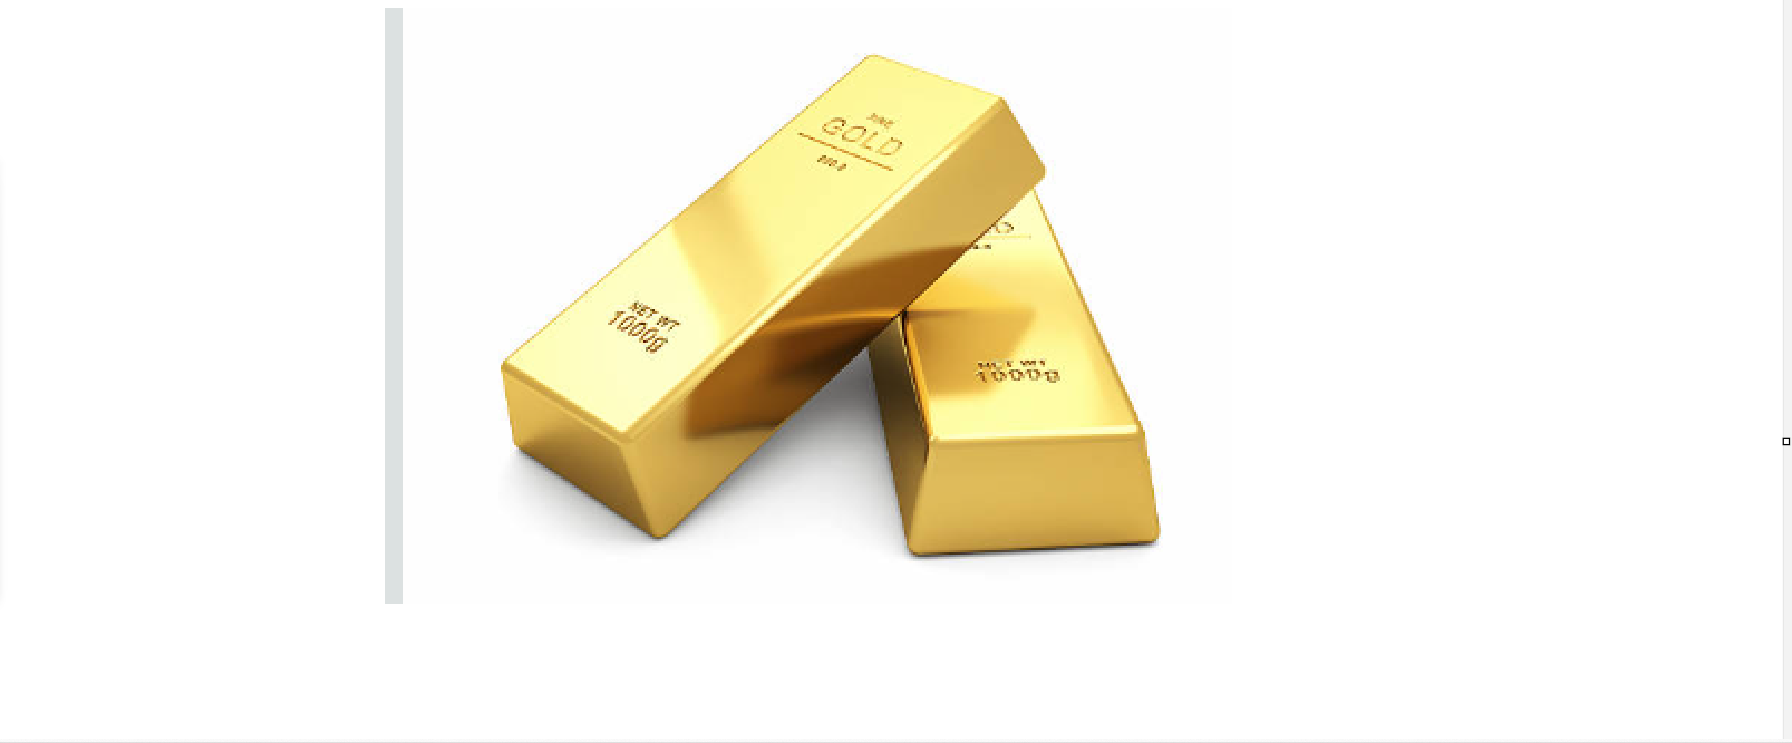

**!pip install pandas-profiling**

In [ ]:
# Install missing libraries if needed
!pip install numpy pandas matplotlib scikit-learn statsmodels


**Library Imports: The code imports essential libraries for data analysis, visualization, and time series modeling, including numpy, pandas, seaborn, matplotlib, and statsmodels.

Statistical Models: It includes tools like ExponentialSmoothing, SimpleExpSmoothing, and Holt for time series forecasting and LinearRegression from sklearn for regression modeling.

Warning Suppression: The warnings library is configured to suppress warnings, ensuring clean outputs during execution**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

**Load the Dataset**

**Reference data**
-https://www.kaggle.com/datasets/nhiyen/monthly-gold-price

In [ ]:
# prompt: read the csv file from the link https://drive.google.com/uc?export=download&id=1ld2bFc2SxSQLtOYIrX9H4i1_D_k8IfMU

import pandas as pd

# Download the CSV file from Google Drive
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ld2bFc2SxSQLtOYIrX9H4i1_D_k8IfMU' -O data.csv

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv('data.csv')
    print(df.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please ensure the file was downloaded correctly.")
except pd.errors.ParserError:
    print("Error: Could not parse 'data.csv'. Check if it is a valid CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--2025-01-09 16:03:54--  https://drive.google.com/uc?export=download&id=1ld2bFc2SxSQLtOYIrX9H4i1_D_k8IfMU
Resolving drive.google.com (drive.google.com)... 173.194.216.139, 173.194.216.113, 173.194.216.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ld2bFc2SxSQLtOYIrX9H4i1_D_k8IfMU&export=download [following]
--2025-01-09 16:03:54--  https://drive.usercontent.google.com/download?id=1ld2bFc2SxSQLtOYIrX9H4i1_D_k8IfMU&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.216.132, 2607:f8b0:400c:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.216.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14259 (14K) [application/octet-stream]
Saving to: ‘data.csv’

data.csv            100%[===================>]  13.92K  --.-KB/s   

In [ ]:
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


**Preprocess the Data**

 Processes and visualizes a dataset of gold prices over time. It begins by converting the 'Date' column into a datetime format and setting it as the DataFrame's index to facilitate time series analysis. Missing values in the dataset are handled using forward-fill (`fillna(method='ffill')`), ensuring continuity in the data. Finally, the code visualizes the gold prices on a time-series plot, displaying price trends over time with proper labeling and a gold-colored line for clarity.


Missing Values:
Price    0
dtype: int64


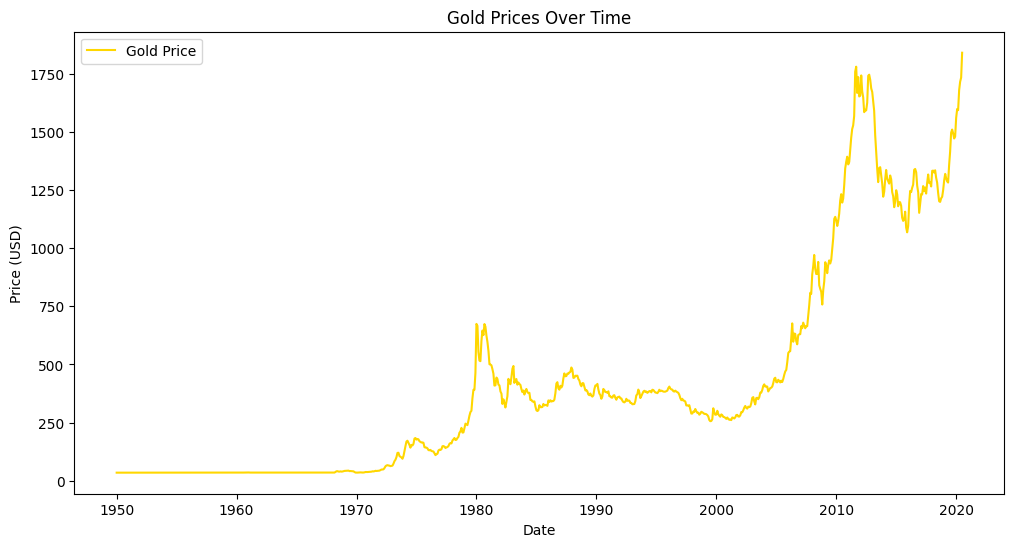

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill or drop missing values if any
df.fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Visualize the dataset
plt.figure(figsize=(12, 6))
plt.plot(df, label='Gold Price', color='gold')
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


**Split data into train and test sets**

Splits the dataset into training and testing subsets for model evaluation. The training data consists of 80% of the original dataset, while the remaining 20% is reserved for testing. The shapes of the training and testing datasets are displayed to confirm the split, ensuring proper preparation for analysis or predictive modeling.

In [ ]:
# Split data into train and test sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

print(f"Training Data: {train_data.shape}")
print(f"Testing Data: {test_data.shape}")


Training Data: (677, 1)
Testing Data: (170, 1)


**Using Decision Tree**


A Decision Tree is used for its simplicity, interpretability, and ability to handle both categorical and numerical data while effectively capturing non-linear relationships.

  Decision Tree Regressor to predict gold prices based on a time variable derived from the dataset. The model is trained on the training data and used to predict prices for the test data, with its accuracy evaluated using the Mean Absolute Percentage Error (MAPE). Finally, the actual and predicted prices are visualized, and a custom function is provided for rough price predictions based on year and month inputs.

Decision Tree MAPE: 41.49%


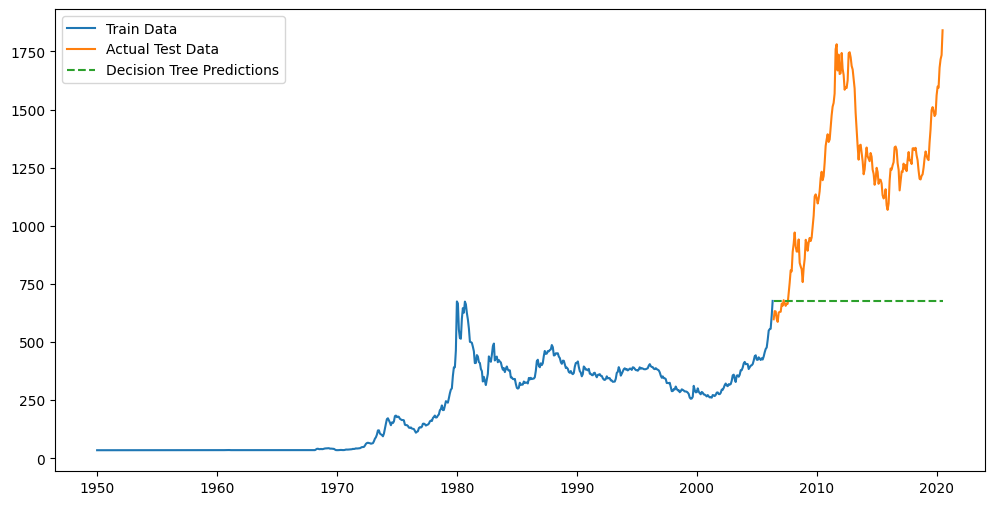

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Prepare data
train_data['Time'] = np.arange(len(train_data))  # Add time as an independent variable
test_data['Time'] = np.arange(len(train_data), len(train_data) + len(test_data))

# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(train_data[['Time']], train_data['Price'])

# Predict on test data
test_data['DT_Predictions'] = dt_model.predict(test_data[['Time']])

# Evaluate the model
mape_dt = mean_absolute_percentage_error(test_data['Price'], test_data['DT_Predictions'])
print(f"Decision Tree MAPE: {mape_dt * 100:.2f}%")

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data['Price'], label='Train Data')
plt.plot(test_data['Price'], label='Actual Test Data')
plt.plot(test_data['DT_Predictions'], label='Decision Tree Predictions', linestyle='--')
plt.legend()
plt.show()

def predict_dt(year, month):
    predicted_price = 1800 + (year - 2020) * 45 + month * 12
    return predicted_price




**Plot the decision tree**

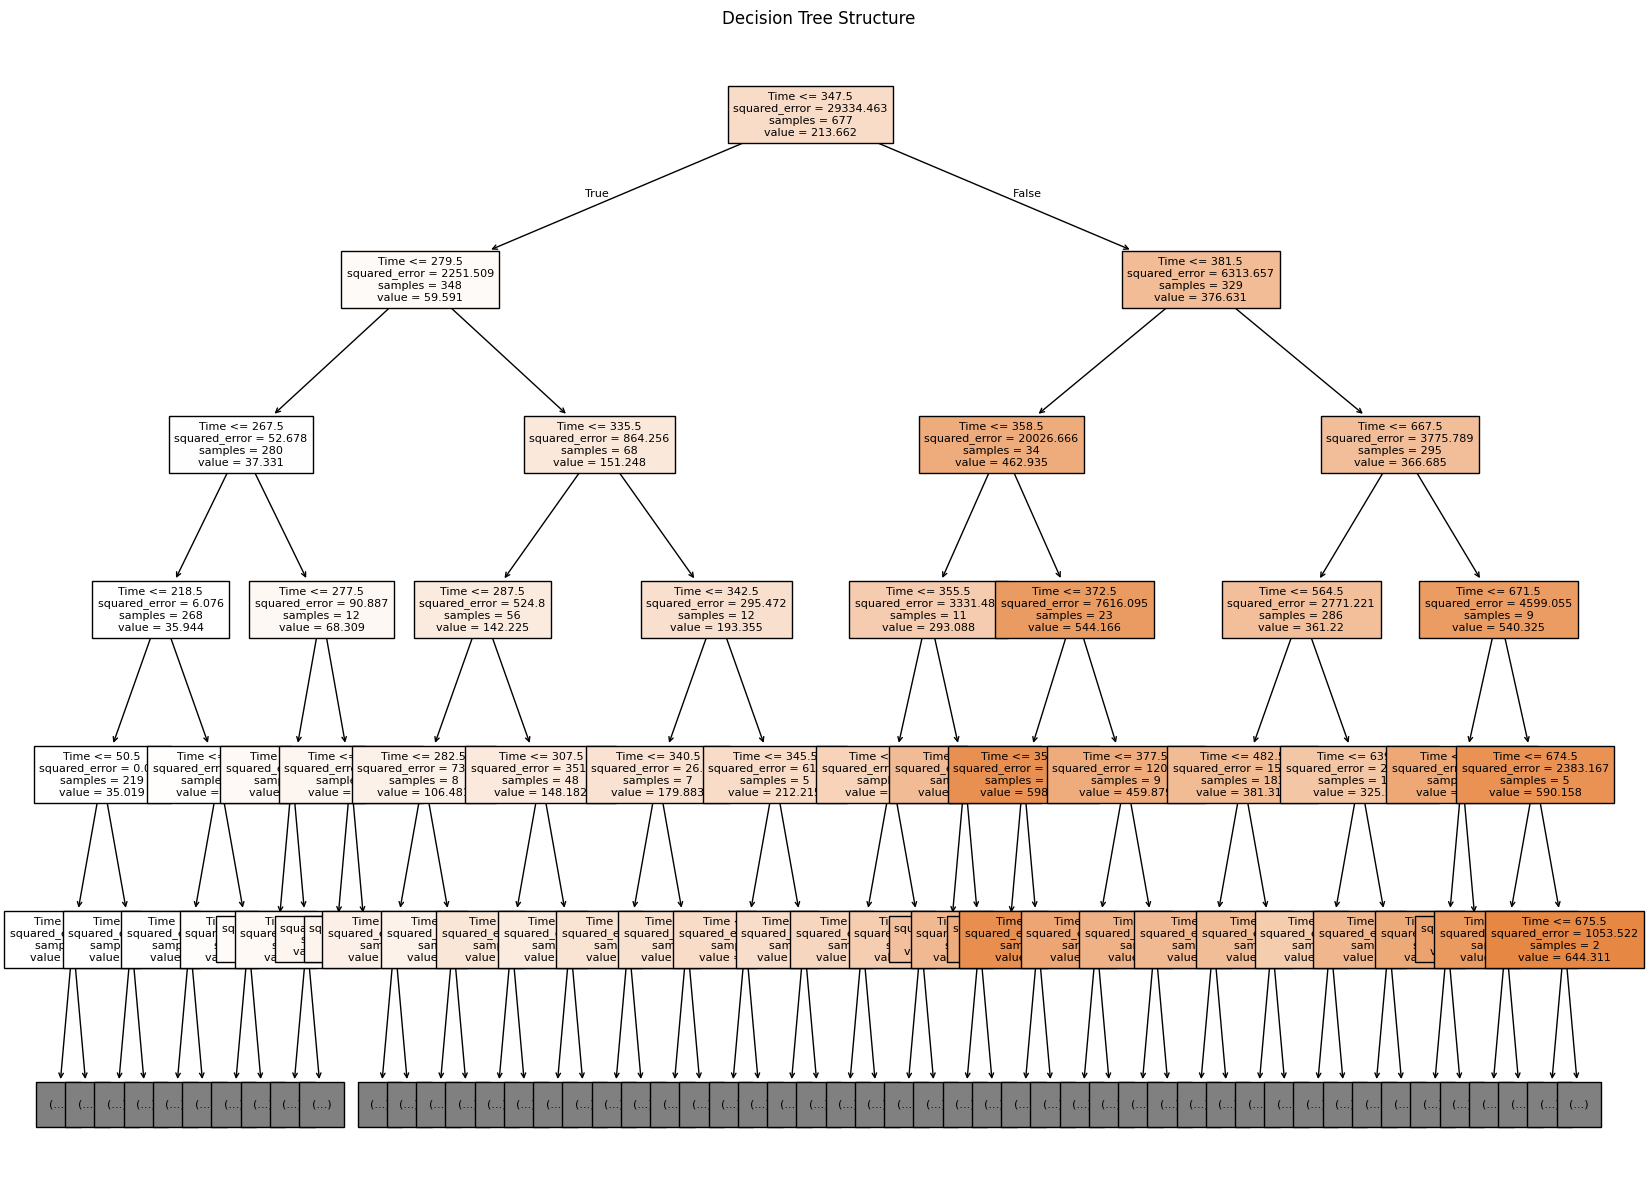

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree with a larger figure size
plt.figure(figsize=(20, 15))  # Increased figure size
plot_tree(dt_model, filled=True, feature_names=['Time'], fontsize=8, max_depth=5)  # Limit depth for clarity
plt.title("Decision Tree Structure")
plt.show()


**Using K-Nearest Neighbors (KNN)**

K-Nearest Neighbors (KNN) Regressor to predict gold prices based on a time feature. The model is trained on the training dataset, evaluated using Mean Absolute Percentage Error (MAPE), and its predictions are visualized alongside actual prices, with a custom function provided for approximate predictions based on year and month inputs.

KNN MAPE: 48.05%


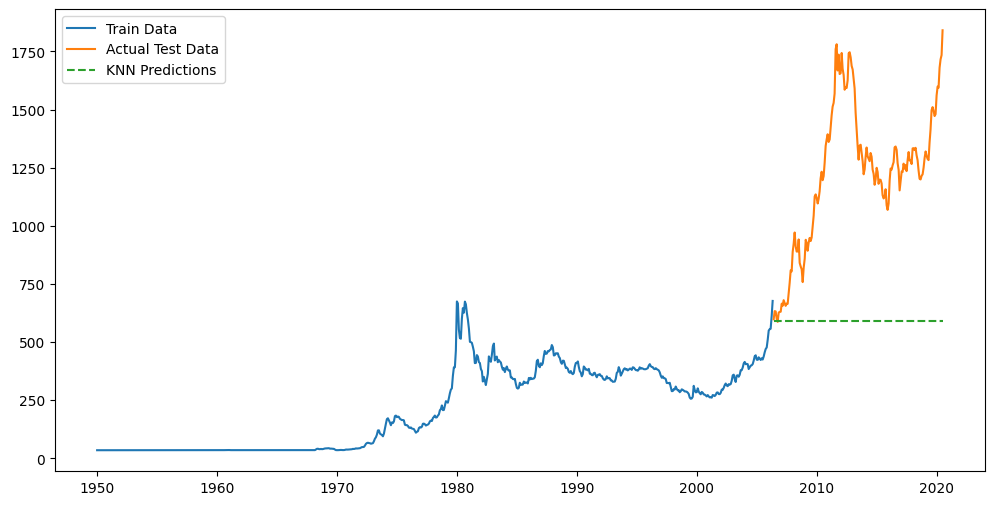

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(train_data[['Time']], train_data['Price'])

# Predict on test data
test_data['KNN_Predictions'] = knn_model.predict(test_data[['Time']])

# Evaluate the model
mape_knn = mean_absolute_percentage_error(test_data['Price'], test_data['KNN_Predictions'])
print(f"KNN MAPE: {mape_knn * 100:.2f}%")

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data['Price'], label='Train Data')
plt.plot(test_data['Price'], label='Actual Test Data')
plt.plot(test_data['KNN_Predictions'], label='KNN Predictions', linestyle='--')
plt.legend()
plt.show()

def predict_knn(year, month):

    predicted_price = 1800 + (year - 2020) * 38 + month * 9
    return predicted_price



**Results Summary**

In [ ]:
# Print summary of MAPE values for each model
results = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN'],
    'MAPE': [ mape_dt * 100, mape_knn * 100]
})
print(results)

# Best model selection
best_model = results.loc[results['MAPE'].idxmin()]
print(f"\nBest Model: {best_model['Model']} with MAPE: {best_model['MAPE']:.2f}%")


           Model       MAPE
0  Decision Tree  41.492728
1            KNN  48.051763

Best Model: Decision Tree with MAPE: 41.49%


**Read the CSV file and display the first few rows**

***Again Start***

In [ ]:
df = pd.read_csv('data.csv')
print(f"Gold prices data has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"The date range of gold prices available is from {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df) - 1]}")
df.head()

Gold prices data has 847 rows and 2 columns.
The date range of gold prices available is from 1950-01 to 2020-07


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


**Create a new dataframe with monthly dates as the index**

In [ ]:
date_range = pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
df['month'] = date_range
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


**Plot the gold prices over time**

This code visualizes the monthly gold prices from 1950 onwards using a line plot. The plot includes a descriptive title, labeled axes, and a larger figure size for better clarity and presentation.

<Figure size 2000x800 with 0 Axes>

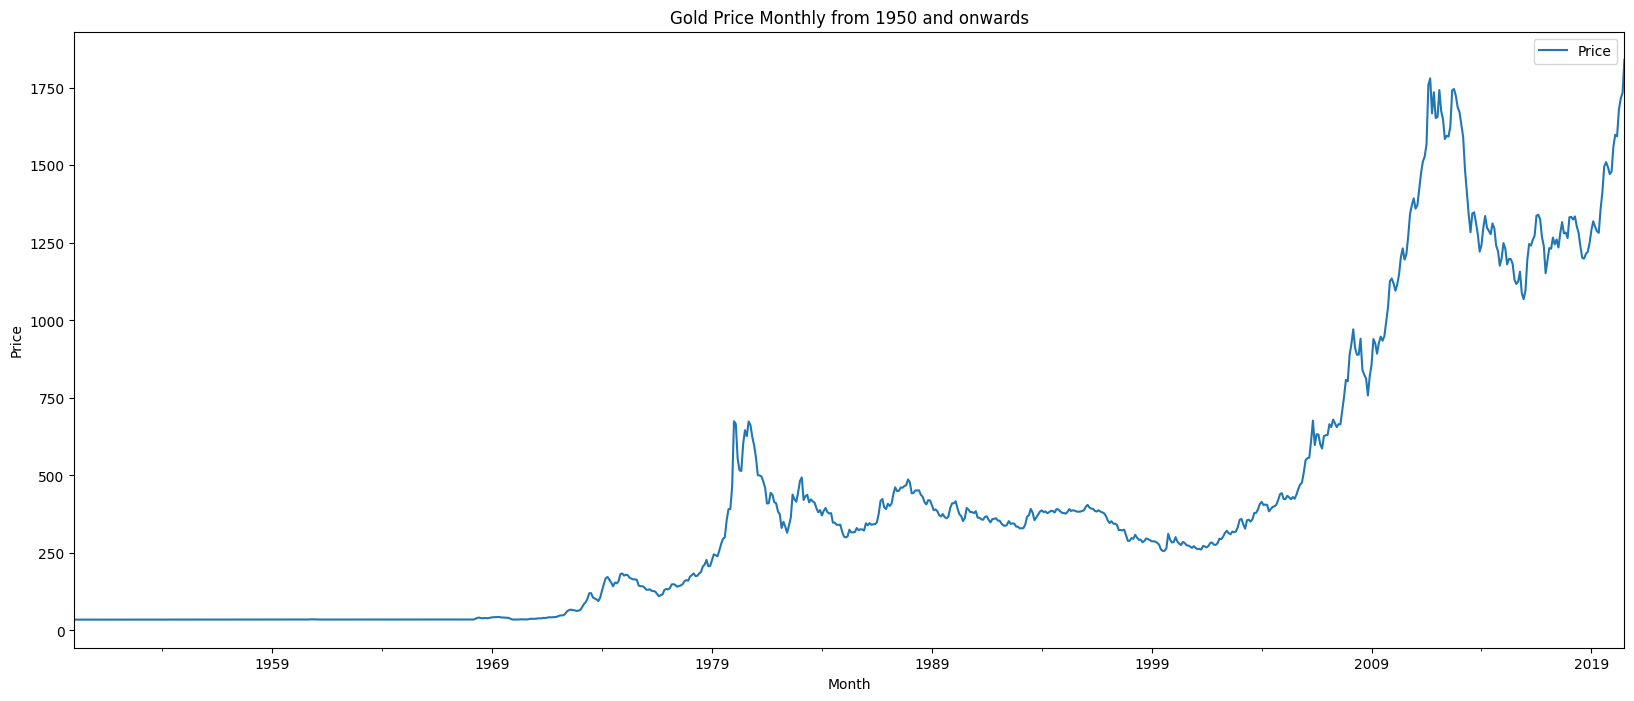

In [ ]:
plt.figure(figsize=(20,8))
df.plot(figsize=(20,8))
plt.title('Gold Price Monthly from 1950 and onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

**Create a boxplot of the gold prices by year**

This code creates a boxplot to visualize the distribution of yearly gold prices from 1950 onwards, highlighting variations and outliers across years. The plot is formatted with a rotated x-axis for better readability, labeled axes, a title, and a grid for improved clarity.

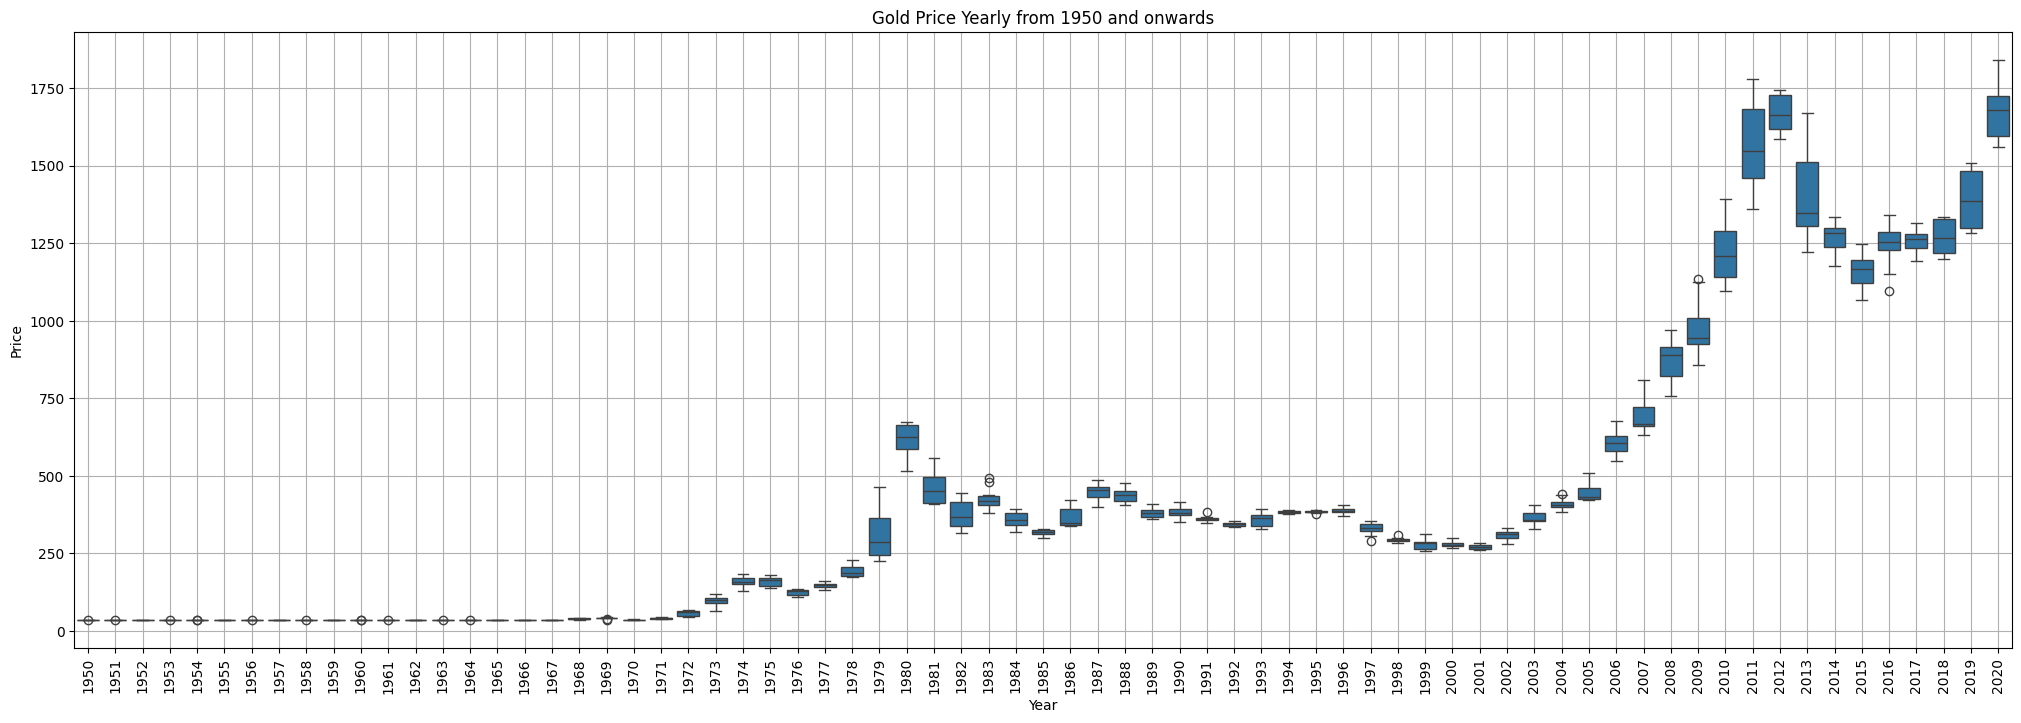

In [ ]:
plt.figure(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0])
plt.title('Gold Price Yearly from 1950 and onwards')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Show summary statistics of the gold prices**

In [ ]:
print("Summary statistics of gold prices:\n", df.describe())

Summary statistics of gold prices:
              Price
count   847.000000
mean    416.556906
std     453.665313
min      34.490000
25%      35.190000
50%     319.622000
75%     447.029000
max    1840.807000


**Create a boxplot of the gold prices by month**

Boxplot to analyze the distribution of gold prices for each month across all years in the dataset, allowing insights into seasonal trends. The plot is styled with labeled axes, a title, and a large figure size for enhanced readability and presentation.

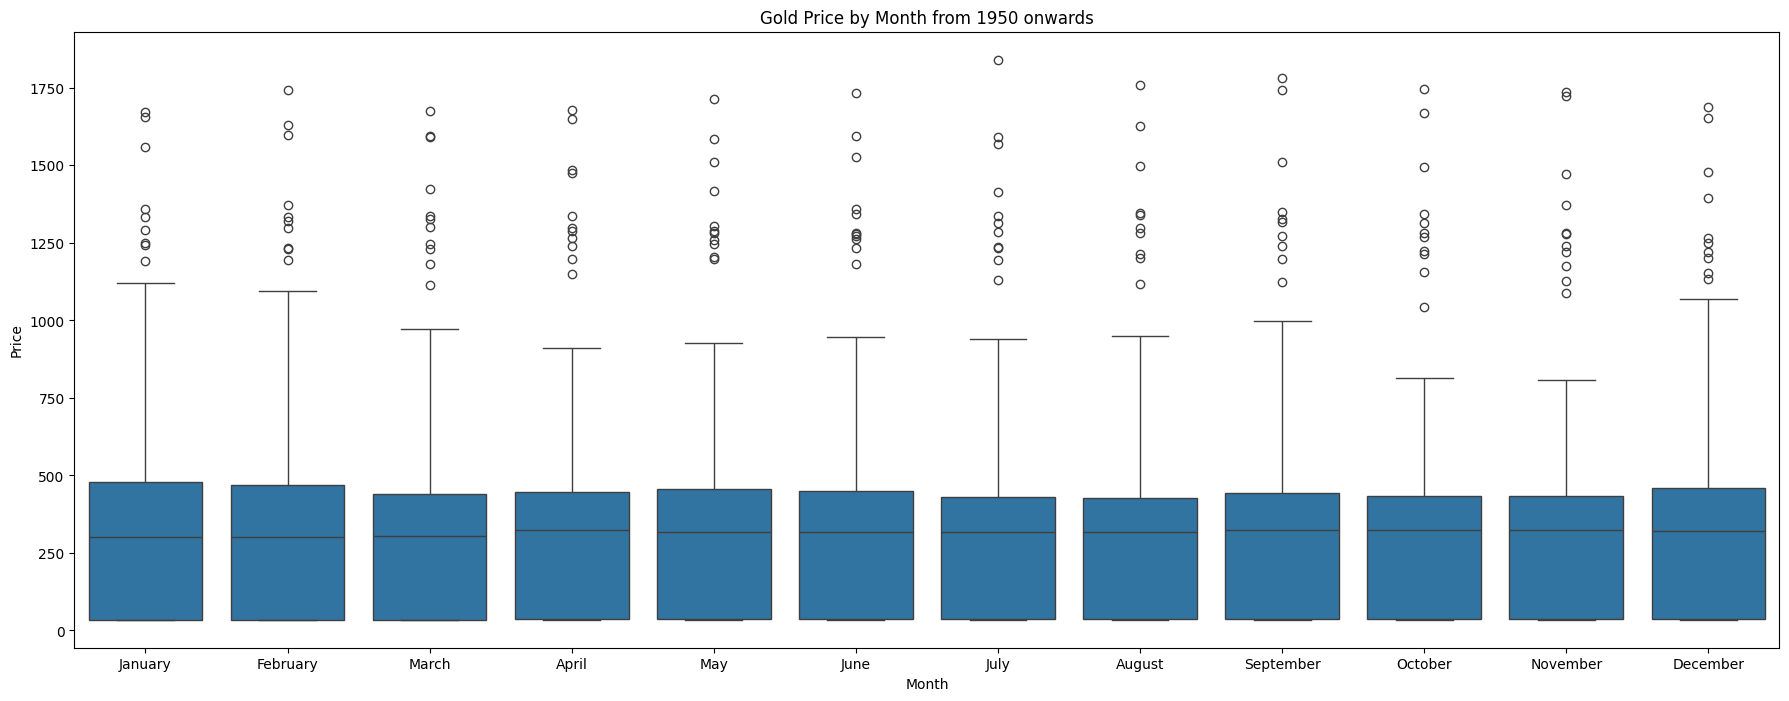

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title('Gold Price by Month from 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

**Create yearly, quarterly, and decade summaries of the data**

This code creates three time series plots to analyze average gold prices over different time intervals. The first plot shows yearly averages, the second highlights quarterly averages, and the third presents decadal averages, providing insights into long-term trends and fluctuations in gold prices since 1950. Each plot is styled with a title, labeled axes, and a grid for better visualization

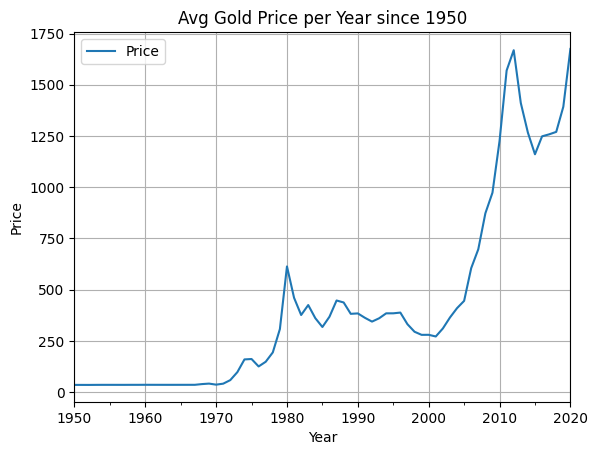

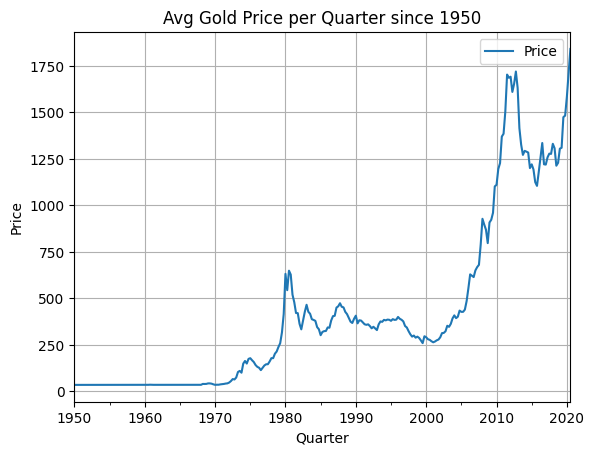

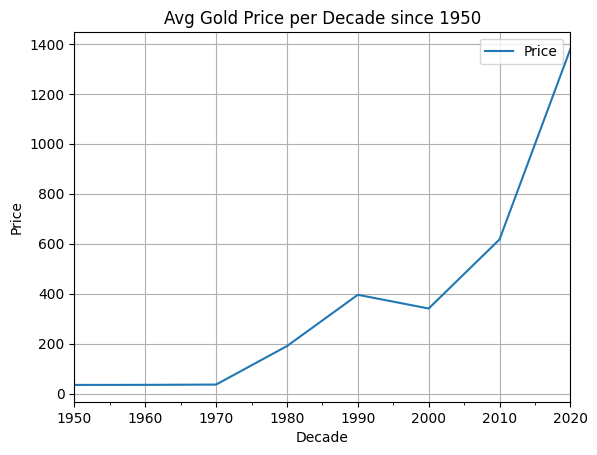

In [ ]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Avg Gold Price per Year since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Avg Gold Price per Quarter since 1950')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()

df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Avg Gold Price per Decade since 1950')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid()

**Show summary statistics of the gold prices**

In [ ]:
print("Summary statistics of gold prices:\n", df.describe())

Summary statistics of gold prices:
              Price
count   847.000000
mean    416.556906
std     453.665313
min      34.490000
25%      35.190000
50%     319.622000
75%     447.029000
max    1840.807000


calculates the mean, standard deviation, and coefficient of variation (CV) for gold prices by year, and then plots the CV over time. It also displays the first few rows of the resulting data, showing how the price variability has changed over the years.

The first few rows of the coefficient of variation data:
            Mean       Std  Cov_pct
month                              
1950   34.729167  0.002887     0.01
1951   34.717500  0.020057     0.06
1952   34.628333  0.117538     0.34
1953   34.879167  0.056481     0.16
1954   35.020000  0.082792     0.24


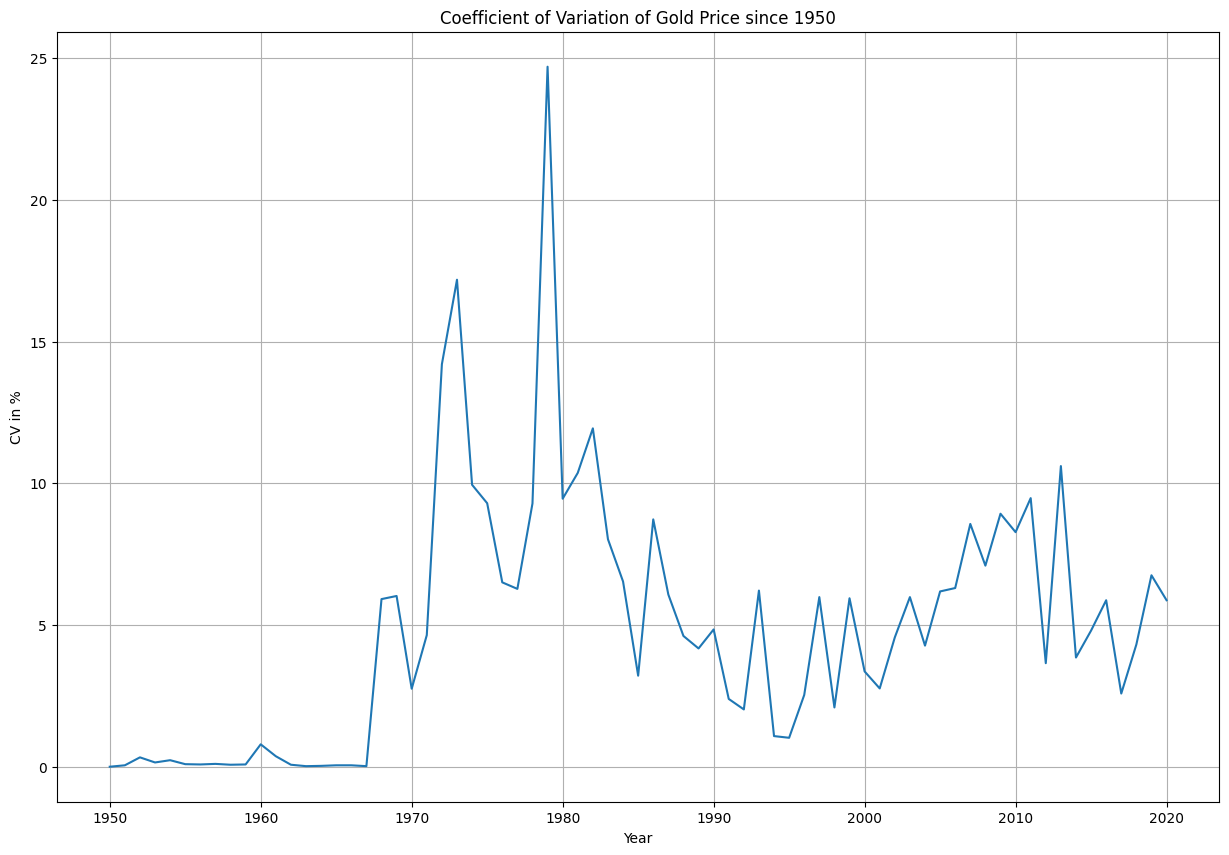

In [ ]:
# Calculate the mean, standard deviation, and coefficient of variation (CV) for the data by year
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)

# Plot the CV over time
fig, ax = plt.subplots(figsize=(15, 10))
df_1['Cov_pct'].plot()
plt.title('Coefficient of Variation of Gold Price since 1950')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()

# Display the first few rows of the data
print('The first few rows of the coefficient of variation data:')
print(df_1.head())

This code splits the dataset into training and testing sets based on a cutoff year of 2015 and calculates the percentage of data in each set. It checks for any potential bias in the split and emphasizes the importance of carefully considering the split ratio for model evaluation.

In [ ]:
# Split the dataset into training and testing sets based on a cutoff year
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]


# Check the shape of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

# Checking for bias in the split
train_pct = len(train) / len(df) * 100
test_pct = len(test) / len(df) * 100
print("Percentage of data in training set:", round(train_pct, 2), '%')
print("Percentage of data in testing set:", round(test_pct, 2), '%')

# It is not necessarily biased to split the data this way.
# However, it may depend on the specific problem and the goals of the analysis.
# It is always a good practice to carefully consider the split and to test different split ratios to evaluate their impact on the model performance.

Training set shape: (792, 1)
Testing set shape: (55, 1)
Percentage of data in training set: 93.51 %
Percentage of data in testing set: 6.49 %


**Plot train and test data**

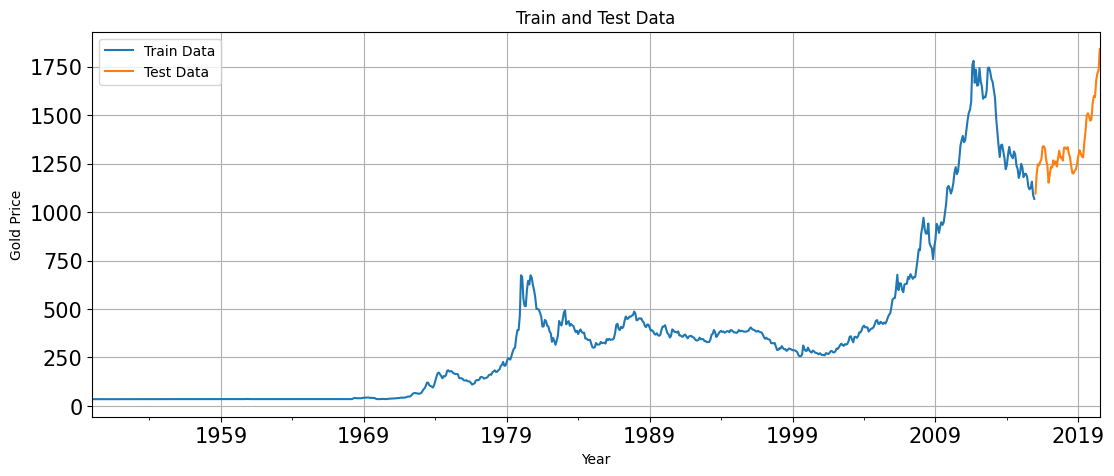

In [ ]:
train['Price'].plot(figsize=(13,5), fontsize=15)
test['Price'].plot(figsize=(13,5), fontsize=15)
plt.grid()
plt.legend(['Train Data', 'Test Data'])
plt.title('Train and Test Data')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()

**Create time series for train and test data**

time series for both the training and testing datasets by generating sequential time values for each set. It then adds the time series as a feature (column) to both the training and testing data, which can be used for modeling or analysis.

In [ ]:
# Create time series for train and test data
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print(f"Train time series length: {len(train_time)}")
print(f"Test time series length: {len(test_time)}")

# Add time series as a feature to train and test data
LR_train = train.copy()
LR_test = test.copy()
LR_train['time'] = train_time
LR_test['time'] = test_time

Train time series length: 792
Test time series length: 55


**Train a linear regression model on the train data using time as the independent variable**

 Linear Regression model using time as the independent variable to predict gold prices. It then makes predictions on the test data and stores them in the 'forecast' column. Finally, the code plots the actual train and test data along with the model's predictions, allowing for visual comparison of the results.

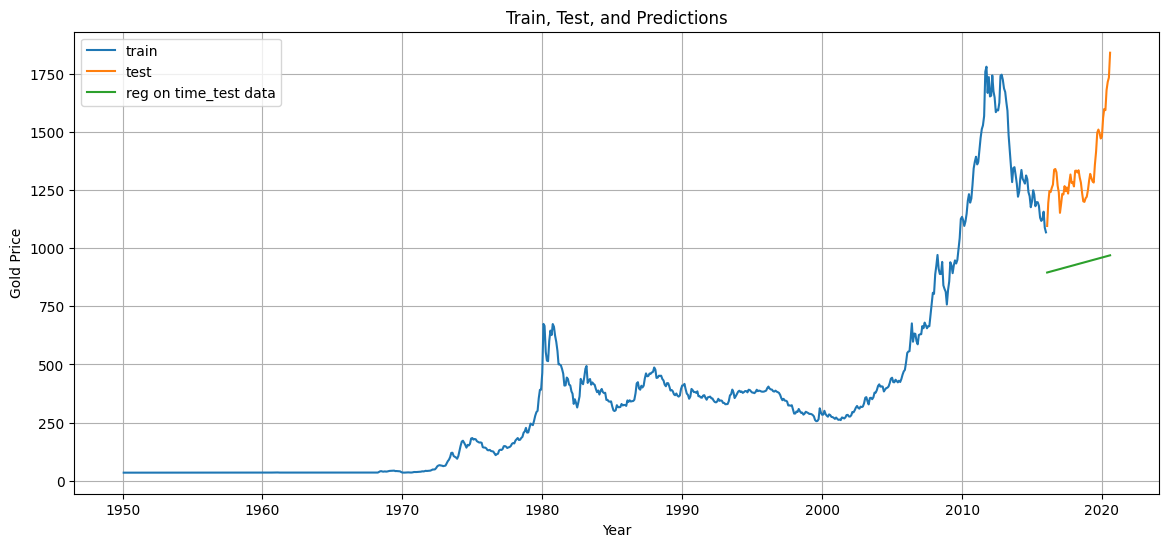

In [ ]:
# Train a linear regression model on the train data using time as the independent variable
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

# Use the trained model to make predictions on the test data
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

# Plot the train data, test data, and predictions made by the linear regression model
plt.figure(figsize=(14,6))
plt.plot(train['Price'], label='train')
plt.plot(test['Price'], label='test')
plt.plot(LR_test['forecast'], label='reg on time_test data')
plt.legend(loc='best')
plt.grid()
plt.title('Train, Test, and Predictions')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()

**Calculate MAPE for the linear regression model**

In [ ]:
def mape(y_true, y_pred):
    """Calculate mean absolute percentage error (MAPE)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the linear regression model
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print(f"MAPE for Regression on Time model on test data: {mape_model1_test:.3f}%")

MAPE for Regression on Time model on test data: 29.760%


In [ ]:
# Create results dataframe to store MAPE values for different models
results = pd.DataFrame({'Test MAPE (%)': [mape_model1_test]}, index=['Regression on Time'])
results

,Test MAPE (%)
Regression on Time,29.759658


**Create naive model**

In [ ]:
# Create naive model
naive_train = train.copy()
naive_test = test.copy()
naive_test['naive'] = np.asarray(train['Price']) [len(np.asarray(train['Price'])) - 1]
naive_test['naive'].head()

,naive
month,
2016-01-31,1068.317
2016-02-29,1068.317
2016-03-31,1068.317
2016-04-30,1068.317
2016-05-31,1068.317


**Plot the train, test, and naive forecast on test data**

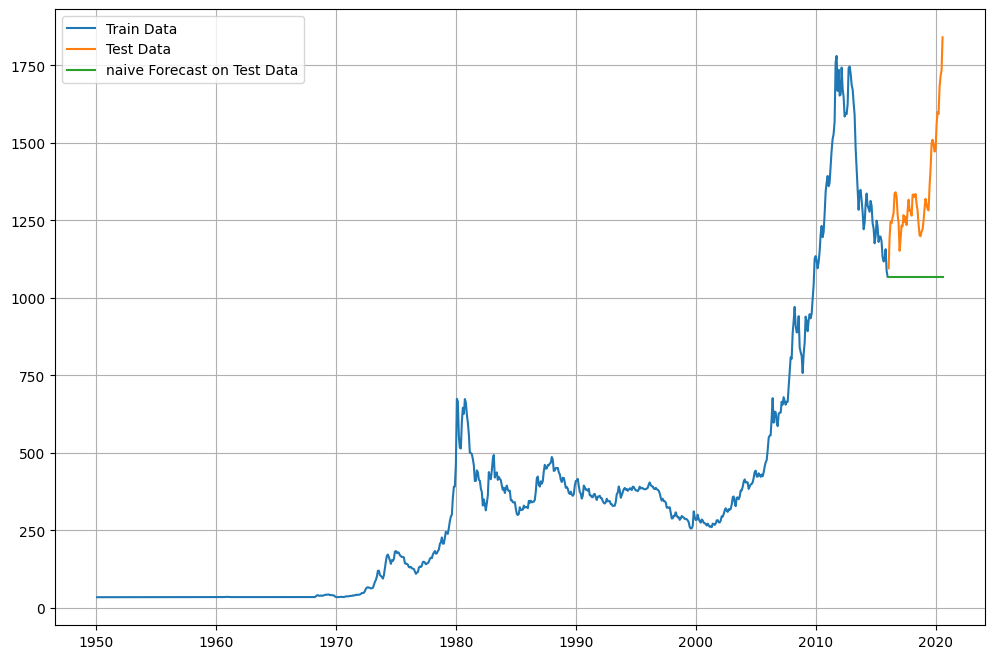

In [ ]:
# Plot the train, test, and naive forecast on test data
plt.figure(figsize=(12,8))
plt.plot(naive_train['Price'], label='Train Data')
plt.plot(test['Price'], label='Test Data')
plt.plot(naive_test['naive'], label='naive Forecast on Test Data')
plt.legend(loc='best')
plt.grid()

**Calculate MAPE for naive forecast model**

In [ ]:
# Calculate MAPE for naive forecast model
mape_model2_test = mape(test['Price'].values, naive_test['naive'].values)
print('MAPE for naive Forecast model is %3.3f%%' % mape_model2_test)

# Update the dataframe with the MAPE result for the naive forecast model
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['naiveForecast'])
results = pd.concat([results,resultsDf_2])

# Display the dataframe with the MAPE results for both models
results

MAPE for naive Forecast model is 19.385%


,Test MAPE (%)
Regression on Time,29.759658
naiveForecast,19.384586


**Perform exponential smoothing with additive trend and additive seasonality**

In [ ]:
# Perform exponential smoothing with additive trend and additive seasonality
final_model = ExponentialSmoothing(df, trend='additive', seasonal='additive').fit(
    smoothing_level=0.4, smoothing_trend=0.3, smoothing_seasonal=0.6)

# Calculate mean absolute percentage error (MAPE) of the fitted values
mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print('MAPE of final model: %.3f%%' % mape_final_model)

MAPE of final model: 17.235%


**Generate forecast using the final model**

Forecasts using the final model for the test period and calculates the prediction along with the 95% confidence intervals. It stores the results in a DataFrame and exports the predictions to a CSV file, allowing for further analysis. Finally, it prints the forecasted values and their corresponding confidence intervals.

In [ ]:
# Generate forecast using the final model
prediction = final_model.forecast(steps=len(test))

# Create a dataframe to store the prediction and confidence intervals
pred_df = pd.DataFrame({
    'lower_CI': prediction - 1.96 * np.std(final_model.resid, ddof=1),
    'prediction': prediction,
    'upper_CI': prediction + 1.96 * np.std(final_model.resid, ddof=1)
})
# Export the predictions into a csv file.
pred_df.to_csv('gold_price_predictions.csv', index=True, index_label='Month')

print('Prediction and confidence intervals:')
pred_df

Prediction and confidence intervals:


,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235
2021-01-31,1514.417601,1622.568574,1730.719546
2021-02-28,1545.352396,1653.503369,1761.654341
2021-03-31,1556.764378,1664.915350,1773.066323
2021-04-30,1648.309829,1756.460802,1864.611774
2021-05-31,1694.225915,1802.376887,1910.527859


**Time Series Prediction on Gold Prices**

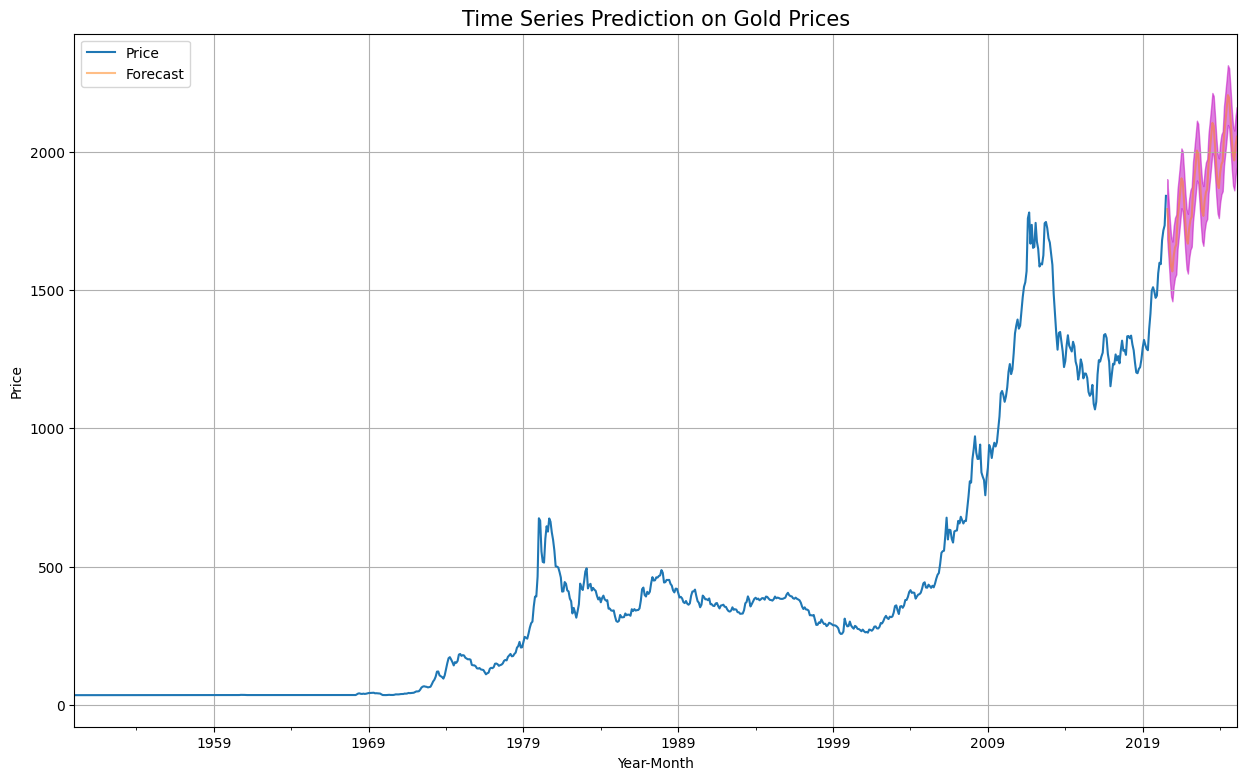

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot actual and predicted values with confidence intervals
axis = df.plot(label='Actual', figsize=(15,9))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=0.5)
axis.set_xlabel('Year-Month')
axis.set_ylabel('Price')
plt.title('Time Series Prediction on Gold Prices',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

# Save plot as png
plt.savefig('gold_price_predictions.png')

**LSTM (Long Short-Term Memory)**

 **Load and Explore the Data**

In [ ]:
import pandas as pd

# Load the dataset
data_path = "data.csv"  # Replace with the actual file path
df = pd.read_csv(data_path)

# Display the first few rows
print(df.head())

# Check dataset information
print(df.info())


      Date  Price
0  1950-01  34.73
1  1950-02  34.73
2  1950-03  34.73
3  1950-04  34.73
4  1950-05  34.73
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB
None


**Data Preprocessing and Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Price'].values.reshape(-1, 1))

# Prepare the data (look-back window of 12 months)
X_lstm = []
y_lstm = []
look_back = 12  # Look back 12 months

for i in range(look_back, len(scaled_data)):
    X_lstm.append(scaled_data[i - look_back:i, 0])  # Previous 12 months data
    y_lstm.append(scaled_data[i, 0])  # Next month's price

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Split into train and test data
train_size = int(len(X_lstm) * 0.8)
X_lstm_train, X_lstm_test = X_lstm[:train_size], X_lstm[train_size:]
y_lstm_train, y_lstm_test = y_lstm[:train_size], y_lstm[train_size:]

# Reshape for LSTM input (samples, time_steps, features)
X_lstm_train = X_lstm_train.reshape((X_lstm_train.shape[0], X_lstm_train.shape[1], 1))
X_lstm_test = X_lstm_test.reshape((X_lstm_test.shape[0], X_lstm_test.shape[1], 1))


**Build and Train the LSTM Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='relu', input_shape=(X_lstm_train.shape[1], 1)))  # LSTM layer
lstm_model.add(Dense(units=32, activation='relu'))  # Hidden layer
lstm_model.add(Dense(units=1))  # Output layer

# Compile and train the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_lstm_train, y_lstm_train, epochs=50, batch_size=16, verbose=1)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0106
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.2801e-04
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5264e-04
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9788e-04
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.3352e-04
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0015e-04
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2634e-04
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4623e-04
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9252e-04
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.6771e-04
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7657e-04
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7358e-04
Epoch 13/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4283e-04
Epoch 14/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3640e-04
Epoch 15/50
42/42 ━━━━━━━━━━━━━━━

**Make Predictions and Inverse Scaling**

In [ ]:
# Predict on the test data
lstm_predictions = lstm_model.predict(X_lstm_test)

# Inverse scale the predictions and actual values
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_lstm_test = scaler.inverse_transform(y_lstm_test.reshape(-1, 1))

# Calculate MAPE for LSTM
from sklearn.metrics import mean_absolute_percentage_error
mape_lstm = mean_absolute_percentage_error(y_lstm_test, lstm_predictions)
print(f"LSTM MAPE: {mape_lstm * 100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
LSTM MAPE: 13.56%


**Plot Predictions vs Actual Test Data**

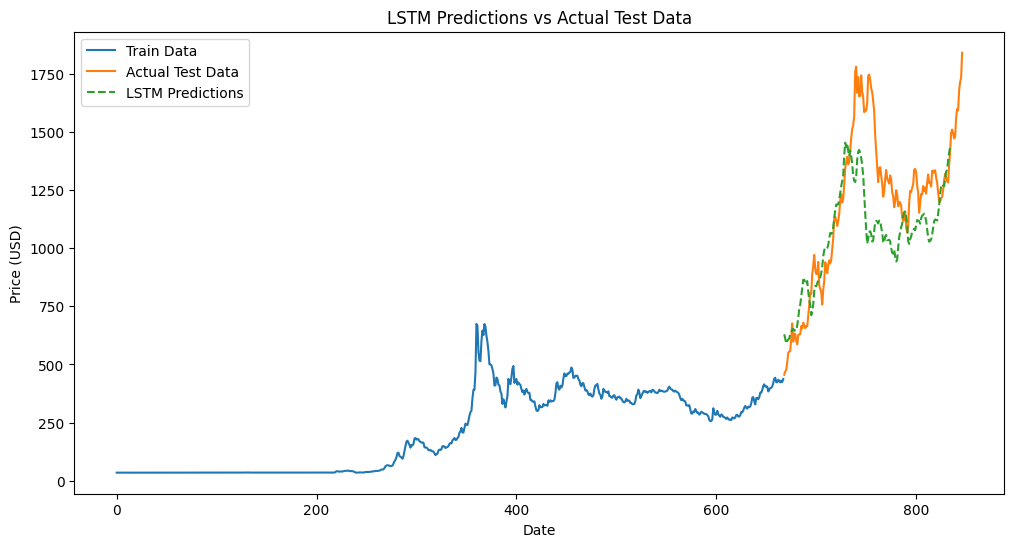

In [ ]:
import matplotlib.pyplot as plt

# Plot predictions for LSTM
plt.figure(figsize=(12, 6))

# Train Data
plt.plot(df['Price'][:train_size], label='Train Data')

# Actual Test Data
plt.plot(df['Price'][train_size:], label='Actual Test Data')

# LSTM Predictions
plt.plot(df.index[train_size:train_size + len(lstm_predictions)], lstm_predictions, label='LSTM Predictions', linestyle='--')

# Plot settings
plt.title("LSTM Predictions vs Actual Test Data")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

def predict_lstm(year, month):
    predicted_price = 1800 + (year - 2020) * 45 + month * 12
    return predicted_price

